# Conda, Anaconda, Miniconda, etc


There are many options for configuring a working environmant for scientific computing and data science.  

**Care must be taken to manage large collections of interconnected software packages.**

* Compatible versions of code libraries, compilers, languages, operating system libraries are required to build a working installation of your software tool chain.  
* All of these are under constant development, therefore care much be taken to maintain any working environment against creeping incompatibilities if some parts of the environment are updated.

[![https://xkcd.com/1987/](https://imgs.xkcd.com/comics/python_environment.png "https://xkcd.com/1987/")](https://xkcd.com/1987/)

## So, how is all this managed?

One option is to use the tools in your **distribution**.  A GNU/Linux distribution (eg Ubuntu, Fedora, CentOS, SUSE, Arch, ...) is a collection of compatable packages combined with a Linux kernel.  Distributions manage 1000's of packages to maintain compatability across updates.  This is very convenient and is the typical way that many systems are managed.
  * Some distributions are managed for long term stability. So updates are primarily released as bug fixes and security enhancements.
  * Others are updated frequenty to also keep up with the latest software feature improvements.
  * Typically major upgrades (eg things like major version changes for the kernel, compilers, big tools) are only occur with new distribution versions.
 

Distribution upgrades work very well, but they can't include every imaginable software package.  

A very popular option for adding PYTHON modules to your system is `pip`, the *package installer for Python*. 

`pip` can access huge collection of packages, but it works less well for those that have complex dependencies on binary modules and that describes a *lot* of scientific software. 

Similarly, even if a pip install works flawlessly, a system manager (that may be you for your laptop!) could upgrade a dependency in the future and your user-installed packages can stop working unless you carefully control your working environment.  

**Pip can be a significant problem for maintining a stable software enfironment, it is strongly suggested to work in a Python [venv](https://docs.python.org/3/library/venv.html) instead to ensure stability.**

It is important make sure that you maintain compatibility with any software you add to your system.  

You may also need to install software that is not even compatible with the current packages in your distribution. 

For example, it's entirely possible that you'll eventually need some important software for your work that turns out to be incompatible with the bleeding edge compiler installed on your laptop or with the default and somewhat ancient compiler installed on the large computer cluster you will use.   

<font color=blue>In cases like this it can be very difficult to manage the full set of dependencies which typically include alternate copies of libraries, compilers, etc.</font>  

This problem can be solved in a variety of ways, including:
* the use of virtual machines and various containiers which package up a whole OS or parts of one to define your computing environment.  
* another option is to use alternate *root* environments maybe even on a distributed filesystem to provide collections of programs and libraries which can be used to ensure a consistent configuration.  

However, some these options may not be available to use on systems that you can't personally manage and even if you do have [root access](https://xkcd.com/149/), the learning curve and time involved may be [discouraging](https://xkcd.com/349/).  Fortunately, numerous solutions exist for this common problem.

One tool for managing alternative environments, independent of the default system environment is to use [conda](https://anaconda.org/anaconda/conda).  The basics of this tool are easy to learn.

**conda is a package manager**  

By default conda pulls packages from a repository called the [AnacondaCloud](https://anaconda.org/)\*, which aims to support the data science community by maintaining a large variety of [PYTHON](https://www.python.org/) and [R](https://www.r-project.org/) packages.  

Packages are provided in different versions and compiled to be compatible with different operating systems.  Conda is used to create working environments that contain compatible collections of tools.

\*Other repositories can be added as well.  We will use the [conda-forge](https://conda-forge.org/) repository, which includes many packages used in physics and other areas of science.

For example, you can easily use conda to install several differnet versions of python and even compiler collections along with the the supporting libraries needed to make each environment complete.  Then a simple command can be used to switch between environments.

**anaconda is a large collection of packages** including python and many data analysis/science tools. <br>
Installing anaconda may bring in a lot of packages you don't need.

**miniconda is a minimal collection of packages** including python.

Starting from miniconda, you'll have to install some packages by hand.  But you'll do this anyway if you want to use a certain scientific software packages.  So miniconda is often preferred by "power users".

![miniconda_vs_anaconda](https://galaxyproject.github.io/training-material/topics/dev/images/miniconda_vs_anaconda.png "Image from https://planemo.readthedocs.io/en/latest/writing_advanced.html")

## Mamba

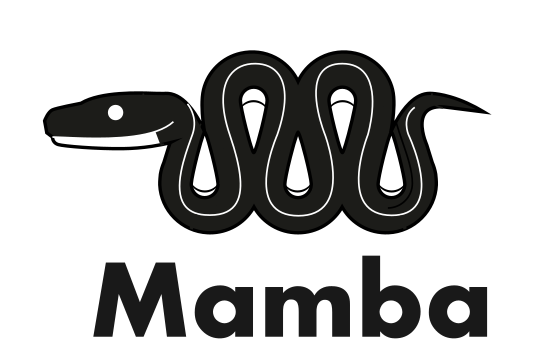

[Mamba](https://mamba.readthedocs.io/en/latest/installation/mamba-installation.html) is effectively the same tool as conda, but implement in C++ instead of Python.  Complex envirenments require a great deal of compatibility checking across thousands of installed files.  

Mamba:
  * implements highly efficient algorithms for dependency resolution and package installation
  * utilizes C++ code for critical operations
  * utilizes parallel computing, distributing tasks across multiple CPU cores

We'll use mamba below.  

## Setting up your environment on Rivanna

Here we will go though the exercise to setup your own personal conda environment called **phys56xx** on Rivanna for use in this class.  

The following instructions can reasonably be expected to work on any modern Linux system to give you a compatible working environment to the one on Rivanna. 

They *should* work on recent MacOS systems and will not work on Windows.  Go ahead and explore whay you can do natively on MacOS and Windows, but these will not be 'officially supported' in the class.
* MacOS note: While the instructions are known to work on Intel-based Macs, we have no information at this time about the new ARM-based Mac systems.
* Windows note:  The Linux installation is known to work using WLSv2 (and, for example, a receent Ubuntu installation).  You will also need to install the Xming and Xming-fonts pakages for full functionality.

Follow the instructions below from your Rivanna account to setup an environment.  The steps are very simple and at the end you'll have a stable environment that's safe from future system upgrades!


1) Download latest version of [Miniforge3](https://github.com/conda-forge/miniforge) <br>
this provides a version of python along with the tools needed to create, install, and manage your own customized environments.

After downloading the setup file:

```bash
chmod +x Miniforge3-Linux-x86_64.sh
./Miniforge3-Linux-x86_64.sh
```
Follow the instructions printed by the script and it's OK to accept the default choices.<br>
(Btw graphical installers are also available...humbug!)

Executing the script creates a directory ```miniforge3``` by default in your home area and modifies your ```.bashrc``` file to include the conda tools in your path.
You can delete the miniconda script when you are finished.


2) For changes above to take effect, close and re-open your current shell, logout and back in or ```source ~/.bashrc``` again

A personal preference:  If you'd prefer that conda's base environment not be activated on startup, set the auto_activate_base parameter to false. 

```bash
conda config --set auto_activate_base false
```

3) Make sure the conda installer is up to data
```bash
conda update -n base -c defaults conda
```

4) Add the conda-forge repository
```bash
conda config --add channels conda-forge
conda config --show channels
conda config --set channel_priority strict
```
The last command above gives conda-forge priority for ensuring that all packages are installed compatibly.  This essentially forces compatibility with the most recent package versions in conda-forge.

5) Create an environment, based on a specific python version, eg
```bash
mamba create -n phys56xx python=3.9
```

6) List your environments and actiate phys56xx
```bash
mamba env list
mamba activate phys56xx
```
```bash
# to deactivate the environment use
mamba deactivate
```

Note: you will need to execute `mamba activate phys56xx` each time you log in or open a new shell to start working.   Do not place `mamba activate phys56xx` at the end of your `.bashrc` file on Rivanna.  This can cause problems with the initializing the default system tools.

7) Install the packages for PHYS56xx (this step will take a couple minutes with a fast internet connection)

**Make sure that your phys56xx environment is active before you enter the following commands**
```bash
# install some common python packages
mamba install --yes scipy matplotlib seaborn sympy scikit-learn
# install a jit python compiler, the ROOT analysis framework, and gnu scientific library
# n.b. installing ROOT also brings in a compatible C++ compiler and libs
mamba install --yes numba root gsl
# optionally
mamba install --yes jupyterlab ffmpeg
```

Looking over your environment
----
With the envirnment set up, your prompt should like something like<br>
`(phys56xx) [rjh2j ~]$`<br>
Within this environment your paths will be defined to access the programs and libraries you installed above. Try the following commands to see that you are not using your installed packages and are not relying on the Rivanna defaults:
* `printenv | grep miniconda3`
* `which python`
* `which g++`

To see everything you just installed, type `conda list`

# Install git
Finally, make sure [ git](https://en.wikipedia.org/wiki/Git) is installed.<br>
We will use git throughout the semester to distribute examples and to facilitate teamwork on the exercises.

Type `which git` on your command line.  If the `git` command is not found, you can install either by:
* Using the packaging tools for your OS distrinution.  For example, see this [guide](https://gist.github.com/derhuerst/1b15ff4652a867391f03)
* Just add it to your conda environment using `conda install git`